In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### Question 1: Events, their Probabilities, and Payoff in the Roulette Game

1. Assuming a perfectly balanced Roulette wheel, calculate the probabilities of each following event (bet):
    - Straight up = Any single number
    
    - Split = any two adjoining numbers vertical or horizontal 
    - Odd = any odd number 
    - 1st Column  (1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34)

In [2]:
1./37 #straight up

0.02702702702702703

In [3]:
2./37 #split

0.05405405405405406

In [4]:
18./37 #Odd

0.4864864864864865

In [5]:
12./37 #1st column

0.32432432432432434

2. Let $X$ be a random variable describing the payout on each of the following bets:
    - When a straight up bet is won, X=35 otherwise -1 
    - When a split up bet is won, X=17 otherwise -1 
    - When an odd bet is won, X=1 otherwise -1 
    - When a 1st column bet is won, X=2 otherwise -1 

What is the expected payout $\mathbb{E}(X)$ for each bet? (Compute the expectation separately for each event)

Formula to apply is $$\mathbb{E}(X) =\sum_x P(X=x) x$$

<span style="color:blue"> By design, the expectation of every bet is -0.027

In [6]:
35.*1/37-1.*36/37 #straight up

-0.027027027027027084

In [7]:
17.*2./37-1.*35/37#split

-0.027027027027026973

In [8]:
1.*18./37-1.*19/37 #Odd

-0.027027027027026973

In [9]:
2.*12./37-1.*25/37#1st column

-0.027027027027026973

3. Assume now that the roulette wheel is not perfectly balanced. This means that the probability of one outcome may be higher than the others. Describe one potential probability function for the wheel outcomes and event that could lead to $\mathbb{E}(X)\ge0$.

<span style="color:blue"> For example favoring numbers on the first column:
$P(1st column)$ = 13./37 
$P(not 1st column)$ = 1-13./37

In [10]:
2.*13./37-1.*(1-13./37)

0.05405405405405406

----

### Question 2: Conditional Probability and Independence

In the green and orange balls setup, two balls are picked in sequence. You can use the decision tree for solving this problem. Alternatively, you can solve it using the conditional probability rule and noticing that 
$$ P(green ball) = P(redbox,green ball) + P(bluebox, green ball) $$


- With replacement of the picked ball. What is the probability that two orange balls are picked? Are the two picks independent?

<span style="color:blue"> P(orange) = P(red,orange) + P(blue,orange) = P(orange|red)p(red) + P(orange|blue)p(blue) = .4 * 6./8 +1./4 *.6

In [11]:
6/8*.4 +1/4*.6

0.45000000000000007

<span style="color:blue"> The events are independent so 
$P(orange_1, orange_2) = p(orange_1)p(orange_2)$

In [12]:
#P(orange_1, orange_2) 
0.45**2

0.2025

- Without replacement of the picked ball. What is the probability that two orange balls are picked? Are the two picks independent?

<span style="color:blue"> Not independent so
$$ p(orange_1,orange_2) = p(orange_1,red_1,orange_2) +  p(orange_1,blue_1,orange_2) = p(orange_2|orange_1,red_1)p(orange_1,red_1) + p(orange_2|orange_1,blue_1)p(orange_1,blue_1)$$
We already calculated $p(orange_1,red_1)$ and $p(orange_1,blue_1)$. They are 6/8 * .4  and 1/4 * .6, respectively

<span style="color:blue">
$p(orange_2|orange_1, red_1)$ and $p(orange_2|orange_1, blue_1)$ is calculated similarly but the number of balls in each box has changed.

<span style="color:blue"> 
    $p(orange_2|orange_1, blue_1)$ = .4* 6./8 + 0 (no more orange balls left in the blue box)
    

<span style="color:blue">
$p(orange_2|orange_1, red_1)$ = .4*5./7 + 1./4*.6

<span style="color:blue"> Finally, we get:

In [13]:
(.4*5./7 + 1./4*.6)*(.4*6/8) + .25*.6*(.4*6/8)

0.17571428571428574

----

### Question 3: Discrete Distribution and the Memory Recall Experiment

- In the memory recall sample, sample the correct number of responses for r = [1.  , 0.81, 0.7 , 0.47, 0.35, 0.21], where $r$ is the probability of responding correctly to a question. Assume 90 questions total. For sampling with the binomial distribution, you can use the Python function `np.random.binomial`. For example:

In [14]:
N = 90
r = 1
y = np.random.binomial(N,r,1)
print(y)

[90]


- Assuming r=.95. What is the probability that all answers are correct? The function `scipy.stats.binom.pmf(k,N,r)` computes the binomial probability mass function, i.e. $n\choose k$ $p^k (1-p)^{n-k}$

In [15]:
scipy.stats.binom.pmf(90,90,.95)

0.009888364709658948

<span style="color:blue"> meaning slightly below 1%

- Compute 100 samples from this distribution (note that this is like completing a 90 question exam 100 times). Calculate the sample mean and the sample variance over these 100 samples. 

In [16]:
N = 90
r = .95
y = np.random.binomial(N,r,100)
print(y)
print(np.mean(y))
print(np.std(y))

[86 83 88 87 86 86 82 89 88 83 87 84 86 86 81 85 85 86 85 83 88 79 85 87
 84 88 83 85 85 80 83 88 80 84 86 85 82 82 85 83 86 84 82 87 83 90 86 86
 88 85 82 89 85 86 86 86 85 86 86 87 86 87 85 79 84 88 87 82 89 87 82 89
 80 85 86 85 83 85 86 83 89 87 88 88 87 85 87 86 83 83 88 87 85 84 85 85
 86 86 85 85]
85.2
2.3151673805580453


- Calculate or search online for the expectation and variance of the Binomial distribution. Do the sample means and variances match the expectations? Why?

<span style="color:blue">  expectation is Np , variance is Np(1-p), standard deviation is $\sqrt{variance}$

In [17]:
E = N*r
V = N*r*(1-r)
S = np.sqrt(V)
print(E,V,S)

85.5 4.275000000000004 2.0676073128135344


- Write the log-likelihood function for these 100 samples

In [18]:
def log_likelihood_recall(r, samples):
    return np.sum(np.log(scipy.stats.binom.pmf(samples,90,r)))

Plot it for $.8<r<1.0$ with the following code (no changes necessary to see the plot). Explain the resulting curve (label the axes, comment on the maxima if any etc.)

Text(0, 0.5, '$L(r;X) = \\sum_i log(P(X_i))$')

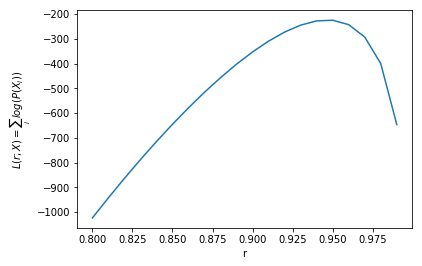

In [19]:
#No changes necessary in this cell
ll = []
range_r = np.arange(.8,1.0,.01)
for r in range_r:
    ll.append(log_likelihood_recall(r, y))
    
plt.plot(range_r, ll);
plt.xlabel('r')
plt.ylabel('$L(r;X) = \sum_i log(P(X_i))$')

The result is negative because the log of any number smaller than 1 is necessarily negative. The log liklihood peaks at around .95, which is the value use for generating the data.

----

### Question 4: Continuous Distribution

Recall the BOLD fMRI experiment
$$
\begin{split}
y_i &= \alpha + x_i \beta + \epsilon_i\\
\epsilon_i &\sim N(0,.2)
\end{split}
$$

- Assuming parameters $\beta=.97$ and $\alpha=.43$, create 10 random samples of $y$ for each of $x$ in `[-1,-.65,-.5,-.1,0,.2,.5,.8]`. Use the function `np.random.normal` to generate the random samples $\epsilon$.

In [20]:
N = 10
mu = 0
sigma = .1
np.random.normal(mu, sigma, size=N)

array([ 0.05182223, -0.00653359,  0.03042596, -0.00664552, -0.25060008,
        0.0111169 ,  0.02416258,  0.03401093,  0.11821319, -0.04658899])

In [21]:
alpha = .43
beta = .97
x =  np.array([-1,-.65,-.5,-.1,0,.2,.5,.8])
mu = alpha+x*beta
y = [np.random.normal(m, sigma, size=N) for m in mu]
y=np.array(y)
print(np.round(y,2))

[[-0.43 -0.57 -0.5  -0.75 -0.66 -0.76 -0.56 -0.59 -0.48 -0.78]
 [-0.23 -0.36 -0.16 -0.17 -0.2  -0.1  -0.36 -0.13 -0.2  -0.16]
 [-0.02 -0.03 -0.22  0.03 -0.03  0.03  0.01  0.   -0.03 -0.12]
 [ 0.34  0.34  0.48  0.3   0.23  0.51  0.2   0.22  0.37  0.34]
 [ 0.51  0.48  0.31  0.35  0.46  0.58  0.4   0.24  0.41  0.44]
 [ 0.72  0.5   0.61  0.56  0.73  0.65  0.51  0.52  0.73  0.63]
 [ 0.85  0.9   0.84  0.98  0.86  1.    1.08  0.91  0.98  0.96]
 [ 1.1   0.99  1.24  1.21  1.21  1.15  1.16  1.33  1.19  1.05]]


- Plot the resulting points

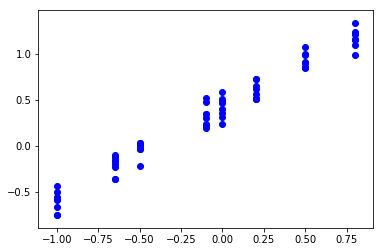

In [22]:
for i in range(len(x)):
    plt.scatter(x,y[:,i], color = 'b')

- What is the distribution for $y$, including its parameters $\mu$ and $\sigma$? Note that the distribution for $y$ is ***not*** $N(0,.2)$
- For x=.65, what is the probability that y lies between .96 and 1.16. You can use the function `scipy.stats.norm.cdf`. For example:

In [23]:
mu = alpha+.65*(sigma)
sigma = .1
scipy.stats.norm.cdf(.3,mu,sigma)

0.02558805952163861

The distribution is N(alpha + beta*x, sigma)

In [27]:
mu = alpha+.65*beta
sigma=.
print(sigma)
scipy.stats.norm.cdf(1.16,mu,sigma) - scipy.stats.norm.cdf(.96,mu,sigma)

0.2


0.38292382234545586

----